In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import absolute
from numpy import sqrt
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import keras
import tensorflow

In [2]:
#pre processing data
df = pd.read_csv('DIM_GPU_PROD.csv')

ids = df['Id']
drops = ["Processor_Manufacturer", "GPU_Manufacturer", "Memory_Type","Id",df.columns[0], df.columns[1]]

df = df.drop(drops,axis =1)

newdf = pd.read_csv('FACT_CRYPTO_RATE.csv')
newdf = newdf[((newdf['CodeId']==6) |( newdf['CodeId'] == 2))&(newdf['TimeId'] >= 20140917)]
newdf = newdf[['Open','Close','TimeId']]
newdf = newdf.head(2054)

df["Close"] = newdf["Close"].values
df["Open"] = newdf["Open"].values
df["Processor"] = pd.factorize(df['Processor'])[0]

X = df.values[:, 0:]

prices_df = pd.read_csv("FACT_GPU_PRICE.csv")

y = prices_df["Price_USD"].head(2054).values


In [3]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [4]:
#Create networks
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model1 = Sequential()

model1.add(Dense(units=3, input_dim=4, kernel_initializer='normal', activation='relu'))
model1.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model1.add(Dense(1, kernel_initializer='normal'))

model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])


model2 = Sequential()

model2.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(units=7, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(1, kernel_initializer='normal'))

model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [7]:
m1 = model1.fit(X_train, y_train ,batch_size = 10, epochs = 70, verbose=1)

Epoch 1/70
165/165 [==============================] - 2s 4ms/step - loss: 4.2432e-05 - accuracy: 0.0000e+00
Epoch 2/70
165/165 [==============================] - 1s 3ms/step - loss: 4.2108e-06 - accuracy: 0.0000e+00: 0s - loss: 3.9560e-06 - ac
Epoch 3/70
165/165 [==============================] - 1s 3ms/step - loss: 3.4406e-06 - accuracy: 0.0000e+00
Epoch 4/70
165/165 [==============================] - 1s 3ms/step - loss: 2.9218e-06 - accuracy: 0.0000e+00
Epoch 5/70
165/165 [==============================] - 1s 3ms/step - loss: 2.7231e-06 - accuracy: 0.0000e+00
Epoch 6/70
165/165 [==============================] - 1s 4ms/step - loss: 2.4118e-06 - accuracy: 0.0000e+00: 0s - loss: 2.6353e-06 - accuracy: 0.00
Epoch 7/70
165/165 [==============================] - 1s 3ms/step - loss: 2.4610e-06 - accuracy: 0.0000e+00
Epoch 8/70
165/165 [==============================] - ETA: 0s - loss: 2.9387e-06 - accuracy: 0.0000e+ - 1s 3ms/step - loss: 2.8545e-06 - accuracy: 0.0000e+00
Epoch 9/70
165/165

In [8]:
m2 = model2.fit(X_train, y_train ,batch_size = 10, epochs = 70, verbose=1)

Epoch 1/70
165/165 [==============================] - 2s 3ms/step - loss: 3.1294e-05 - accuracy: 0.0000e+00
Epoch 2/70
165/165 [==============================] - 0s 3ms/step - loss: 7.7594e-06 - accuracy: 0.0000e+00
Epoch 3/70
165/165 [==============================] - 0s 3ms/step - loss: 5.1782e-06 - accuracy: 0.0000e+00
Epoch 4/70
165/165 [==============================] - 0s 3ms/step - loss: 4.4667e-06 - accuracy: 0.0000e+00
Epoch 5/70
165/165 [==============================] - 0s 3ms/step - loss: 3.9882e-06 - accuracy: 0.0000e+00
Epoch 6/70
165/165 [==============================] - 0s 2ms/step - loss: 3.2164e-06 - accuracy: 0.0000e+00
Epoch 7/70
165/165 [==============================] - 0s 2ms/step - loss: 3.5704e-06 - accuracy: 0.0000e+00
Epoch 8/70
165/165 [==============================] - 0s 3ms/step - loss: 3.3538e-06 - accuracy: 0.0000e+00
Epoch 9/70
165/165 [==============================] - 0s 3ms/step - loss: 3.2666e-06 - accuracy: 0.0000e+00
Epoch 10/70
165/165 [=======

In [9]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

mse1 = [(predict1[i][0] - y_test[i])**2 for i in range(len(y_test))]
mse2 = [(predict2[i][0] - y_test[i])**2 for i in range(len(y_test))]

dat1 = [[predict1[i][0],y_test[i]] for i in range(len(y_test)) ]
dat2 = [[predict2[i][0],y_test[i]] for i in range(len(y_test)) ]

In [10]:
nn1 = pd.DataFrame(data = dat1,columns = ["Predicted USD","Actual USD"])
nn2 = pd.DataFrame(data = dat2,columns = ["Predicted USD","Actual USD"])

nn1["MSE"] = mse1
nn2["MSE"] = mse2

In [11]:
from numpy import mean

print("MSE of NN1:",mean(nn1["MSE"]))
print("MSE of NN2:",mean(nn2["MSE"]))

MSE of NN1: 2.254990235890632e-06
MSE of NN2: 1.7203307630334336e-06


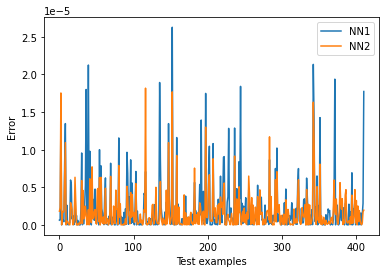

In [12]:
#plot MSE
plt.plot(mse1, label = "NN1")
plt.plot(mse2, label = "NN2")

plt.xlabel("Test examples")
plt.ylabel("Error")

plt.legend()
plt.show()

In [13]:
nn1

,Predicted USD,Actual USD,MSE
0,0.025208,0.026000,6.278727e-07
1,0.030119,0.030937,6.695120e-07
2,0.025239,0.028986,1.404098e-05
3,0.025560,0.025655,8.990519e-09
4,0.025352,0.025989,4.056586e-07
...,...,...,...
406,0.026833,0.025572,1.591160e-06
407,0.025338,0.025161,3.101665e-08
408,0.026736,0.025557,1.389927e-06
409,0.028919,0.027225,2.871412e-06


In [14]:
nn2

,Predicted USD,Actual USD,MSE
0,0.024650,0.026000,1.824197e-06
1,0.029417,0.030937,2.310909e-06
2,0.024798,0.028986,1.753901e-05
3,0.025539,0.025655,1.336032e-08
4,0.024645,0.025989,1.805664e-06
...,...,...,...
406,0.025969,0.025572,1.580183e-07
407,0.025003,0.025161,2.502062e-08
408,0.026047,0.025557,2.400254e-07
409,0.028549,0.027225,1.754449e-06


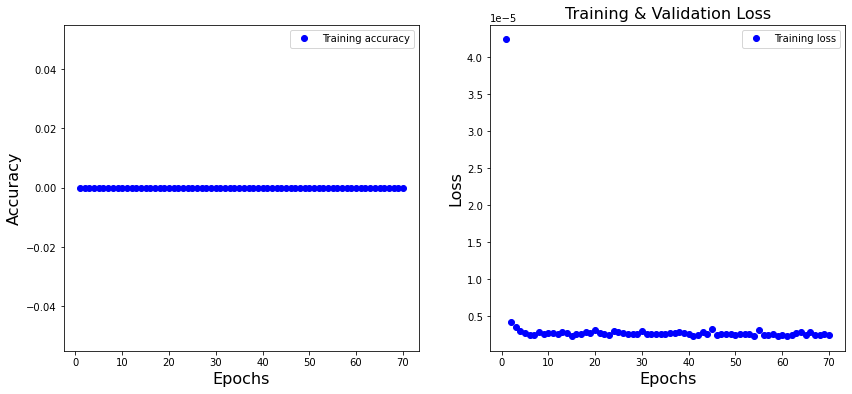

In [15]:
history_dict = m1.history
loss_values = history_dict['loss']

accuracy = history_dict['accuracy']


epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
#ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
#ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
#ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

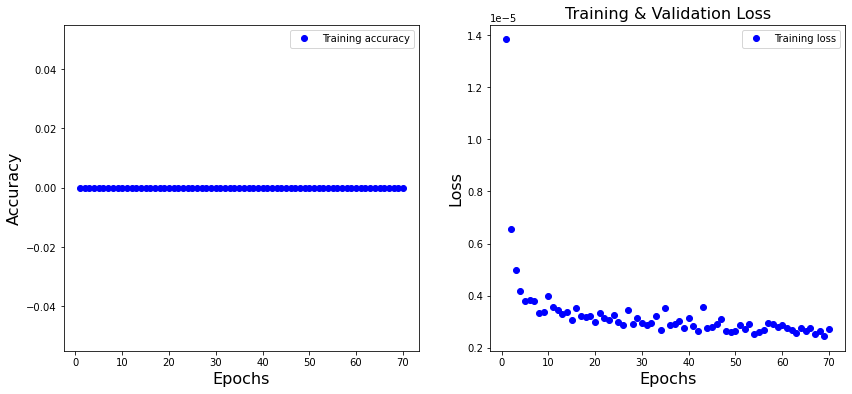

In [16]:
history_dict = m2.history
loss_values = history_dict['loss']

accuracy = history_dict['accuracy']


epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
#ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
#ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
#ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [17]:
nn1.to_csv("./nn_model_1.csv")
nn2.to_csv("./nn_model_2.csv")